In [3]:
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt    
from fastparquet import ParquetFile

from utils import remove_highly_correlated_features, feature_drop

import warnings
warnings.filterwarnings("ignore")

Read data

In [27]:
file_path = "Data/train_ai_comp_final_dp.parquet"
pf = ParquetFile(file_path)
df = pf.to_pandas()

Preproccess

In [28]:
fature_to_drop = remove_highly_correlated_features(df, threshold=0.94)
df.drop(columns=fature_to_drop, inplace=True)
df = df.fillna(0)

Model

In [6]:
X = df.drop('target', axis=1)
y = df['target']

# модель с l1 регуляризацией 
model = Lasso(alpha=0.1)  
model.fit(X, y)

feature_weights = {feature: weight for feature, weight in zip(X.columns, model.coef_)}

Weights

In [7]:
feature_weights = {feature: weight for feature, weight in zip(X.columns, model.coef_)}

Text(0.5, 0, 'Weights')

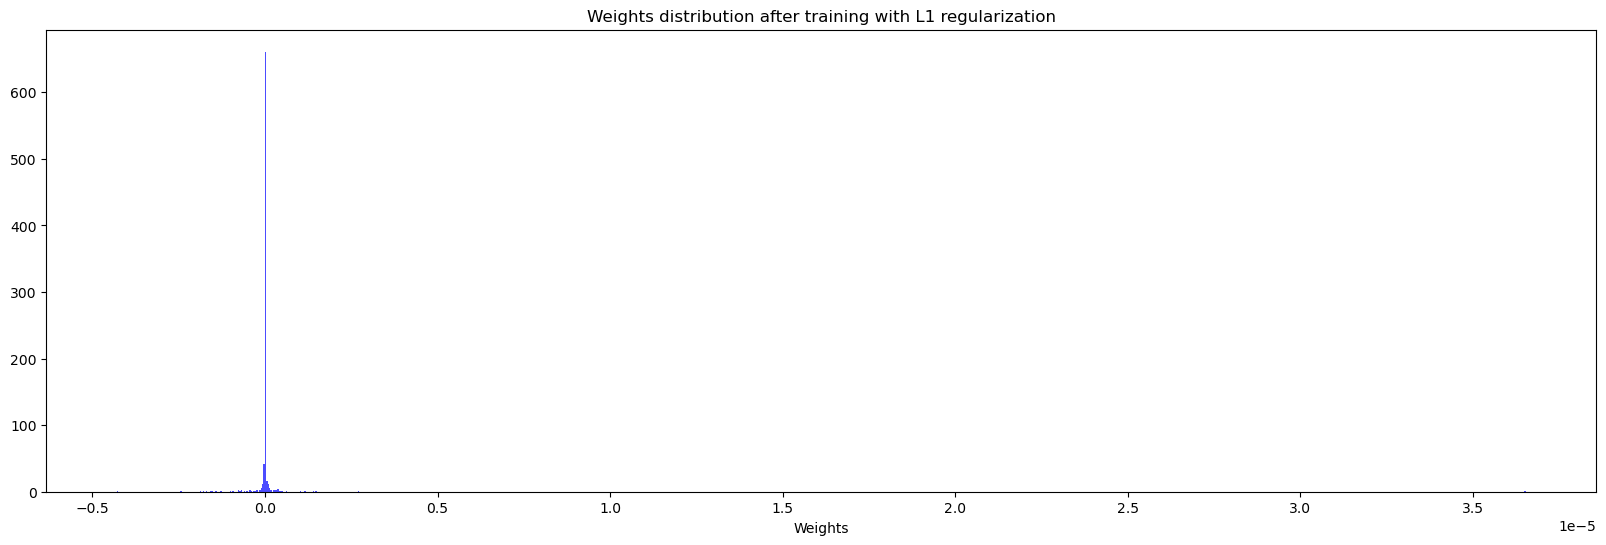

In [8]:
plt.figure(figsize=(20, 6))
plt.hist(feature_weights.values(), bins=1000, color='blue', alpha=0.7)
plt.title('Weights distribution after training with L1 regularization')
plt.xlabel('Weights')

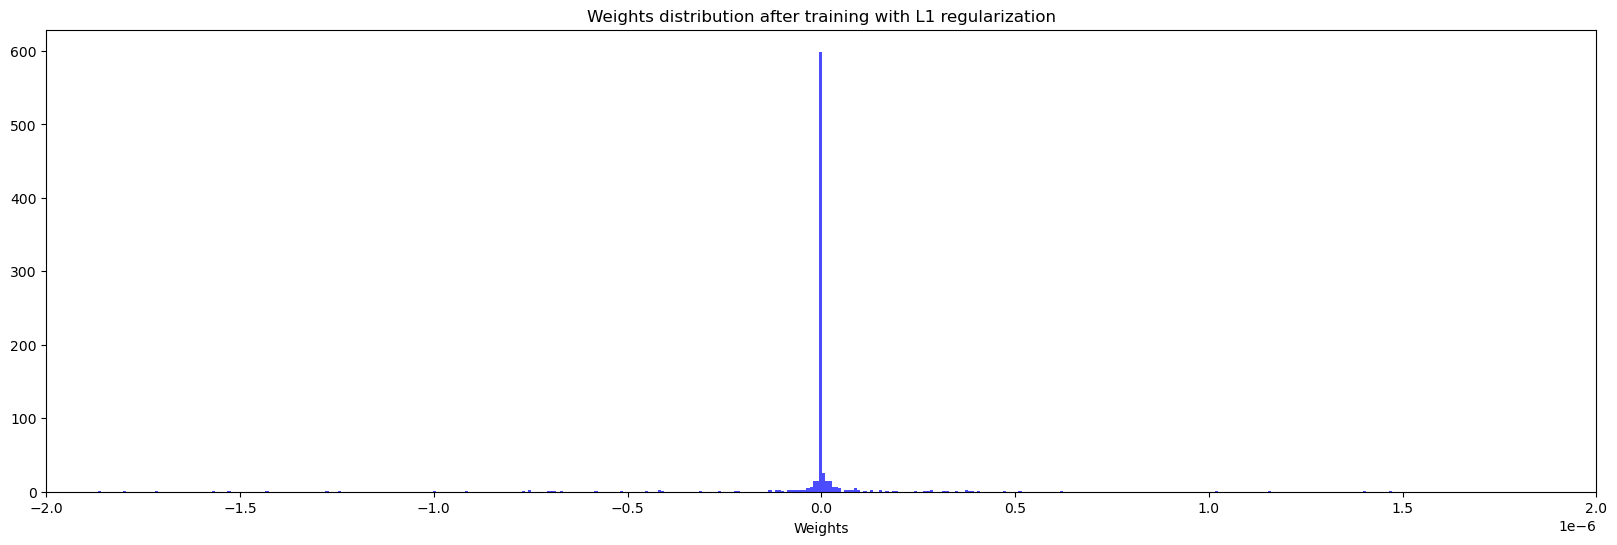

In [9]:
plt.figure(figsize=(20, 6))
plt.hist(feature_weights.values(), bins=5000, color='blue', alpha=0.7)
plt.title('Weights distribution after training with L1 regularization')
plt.xlabel('Weights')
plt.xlim(-2e-6, 2e-6)
None

In [10]:
len([value for value in feature_weights.values() if value != 0])

231

In [11]:
selected_features = [key for key, value in feature_weights.items() if value != 0]

In [12]:
df_sel = df[selected_features]

In [13]:
print(selected_features)
true = ["feature1004", "feature341", "feature940", "feature319", "feature951", "feature988", "feature920", "feature44", "feature1", "feature90", "feature783", "feature782", "feature191", "feature907", "feature211", "feature342", "feature98", "feature94", "feature122", "feature209", "feature46", "feature900", "feature591", "feature454", "feature180", "feature989", "feature861", "feature1036", "feature470", "feature928", "feature898", "feature226", "feature25", "feature358", "feature446", "feature893", "feature5", "feature755", "feature572", "feature497", "feature930", "feature922", "feature472", "feature504", "feature688", "feature1075", "feature435", "feature141", "feature915", "feature540", "feature368", "feature459", "feature94", "feature316", "feature532", "feature817", "feature919", "feature2", "feature781", "feature287", "feature934", "feature1056", "feature89", "feature986", "feature491", "feature506", "feature489", "feature997", "feature340", "feature351", "feature182", "feature53", "feature715", "feature4", "feature918", "feature366", "feature854", "feature75", "feature917", "feature531", "feature554", "feature429", "feature405", "feature892", "feature335", "feature3", "feature286", "feature374", "feature777", "feature508", "feature488", "feature553", "feature810", "feature344", "feature154", "feature527", "feature820", "feature1045", "feature537", "feature856", "feature1065", "feature188", "feature535", "feature12", "feature1064", "feature932", "feature897", "feature452", "feature926", "feature82", "feature599", "feature1057", "feature393", "feature20"]
intersection = [value for value in selected_features if value in true]
print(len(true), len(intersection))

['id', 'feature1', 'feature4', 'feature22', 'feature33', 'feature35', 'feature36', 'feature37', 'feature38', 'feature41', 'feature43', 'feature44', 'feature45', 'feature46', 'feature47', 'feature49', 'feature53', 'feature58', 'feature59', 'feature63', 'feature67', 'feature71', 'feature72', 'feature73', 'feature74', 'feature75', 'feature76', 'feature77', 'feature78', 'feature79', 'feature84', 'feature86', 'feature88', 'feature91', 'feature93', 'feature94', 'feature95', 'feature96', 'feature98', 'feature99', 'feature100', 'feature101', 'feature102', 'feature103', 'feature104', 'feature105', 'feature106', 'feature107', 'feature108', 'feature109', 'feature110', 'feature111', 'feature112', 'feature113', 'feature114', 'feature115', 'feature116', 'feature117', 'feature118', 'feature120', 'feature121', 'feature122', 'feature123', 'feature124', 'feature127', 'feature133', 'feature136', 'feature137', 'feature138', 'feature139', 'feature141', 'feature143', 'feature145', 'feature147', 'feature148'

In [23]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score

X = df_sel
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=8, loss_function='Logloss')
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)


0:	learn: 0.6775991	test: 0.6776408	best: 0.6776408 (0)	total: 75.5ms	remaining: 1m 15s
100:	learn: 0.1817507	test: 0.1830325	best: 0.1830325 (100)	total: 5.04s	remaining: 44.9s
200:	learn: 0.1460943	test: 0.1485685	best: 0.1485685 (200)	total: 10.4s	remaining: 41.4s
300:	learn: 0.1406943	test: 0.1441590	best: 0.1441590 (300)	total: 16.1s	remaining: 37.3s
400:	learn: 0.1388501	test: 0.1431147	best: 0.1431147 (400)	total: 21.7s	remaining: 32.4s
500:	learn: 0.1376989	test: 0.1426630	best: 0.1426630 (500)	total: 27.3s	remaining: 27.2s
600:	learn: 0.1367646	test: 0.1423699	best: 0.1423699 (600)	total: 32.7s	remaining: 21.7s
700:	learn: 0.1359710	test: 0.1421431	best: 0.1421431 (700)	total: 37.6s	remaining: 16s
800:	learn: 0.1352557	test: 0.1419911	best: 0.1419911 (800)	total: 42.4s	remaining: 10.5s
900:	learn: 0.1345868	test: 0.1418622	best: 0.1418622 (900)	total: 47.4s	remaining: 5.21s
999:	learn: 0.1339819	test: 0.1417682	best: 0.1417682 (999)	total: 52.1s	remaining: 0us

bestTest = 0.14

In [22]:
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {classification_report(y_test, y_pred)}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba.ravel()[1::2])

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy:               precision    recall  f1-score   support

           0       0.96      1.00      0.98    100192
           1       0.70      0.00      0.00      3731

    accuracy                           0.96    103923
   macro avg       0.83      0.50      0.49    103923
weighted avg       0.95      0.96      0.95    103923

Precision: 0.7
Recall: 0.001876172607879925
ROC AUC: 0.7262424892531186


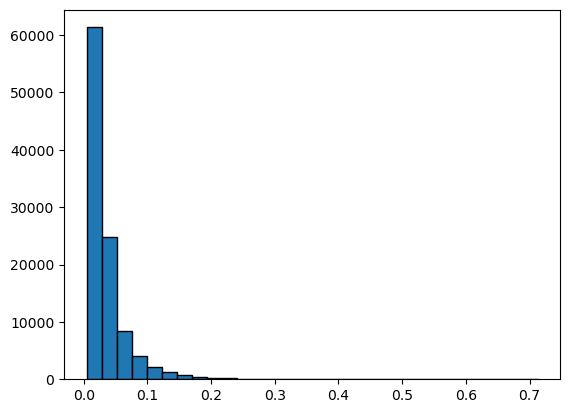

In [26]:
import matplotlib.pyplot as plt
plt.hist(y_pred_proba.ravel()[1::2], bins=30, edgecolor='black')
# plt.ylim(0, 100)
None

In [ ]:
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)

In [30]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score

X = df.drop(["target"], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=8, loss_function='Logloss')
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)


0:	learn: 0.6777110	test: 0.6777735	best: 0.6777735 (0)	total: 121ms	remaining: 2m
100:	learn: 0.1817876	test: 0.1829480	best: 0.1829480 (100)	total: 7.48s	remaining: 1m 6s
200:	learn: 0.1451756	test: 0.1474658	best: 0.1474658 (200)	total: 15.6s	remaining: 1m 1s
300:	learn: 0.1394146	test: 0.1426996	best: 0.1426996 (300)	total: 24.4s	remaining: 56.7s
400:	learn: 0.1374373	test: 0.1415180	best: 0.1415180 (400)	total: 33.1s	remaining: 49.5s
500:	learn: 0.1362606	test: 0.1410282	best: 0.1410282 (500)	total: 41.4s	remaining: 41.3s
600:	learn: 0.1353437	test: 0.1407207	best: 0.1407207 (600)	total: 49.5s	remaining: 32.8s
700:	learn: 0.1345652	test: 0.1404689	best: 0.1404689 (700)	total: 57.3s	remaining: 24.4s
800:	learn: 0.1339069	test: 0.1402931	best: 0.1402931 (800)	total: 1m 4s	remaining: 16.1s
900:	learn: 0.1332835	test: 0.1401687	best: 0.1401685 (899)	total: 1m 12s	remaining: 7.97s
999:	learn: 0.1327231	test: 0.1400526	best: 0.1400526 (999)	total: 1m 20s	remaining: 0us

bestTest = 0.140

In [31]:
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {classification_report(y_test, y_pred)}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba.ravel()[1::2])

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy:               precision    recall  f1-score   support

           0       0.96      1.00      0.98    100192
           1       0.71      0.00      0.01      3731

    accuracy                           0.96    103923
   macro avg       0.84      0.50      0.49    103923
weighted avg       0.96      0.96      0.95    103923

Precision: 0.7142857142857143
Recall: 0.002680246582685607
ROC AUC: 0.7400665554619719


In [35]:
feature_weights = {feature: weight for feature, weight in zip(X.columns, model.feature_importances_)}
dict(sorted(feature_weights.items(), key=lambda item: item[1]))

{'sample_ml_new': 0.0,
 'feature26': 0.0,
 'feature68': 0.0,
 'feature69': 0.0,
 'feature144': 0.0,
 'feature160': 0.0,
 'feature214': 0.0,
 'feature224': 0.0,
 'feature232': 0.0,
 'feature281': 0.0,
 'feature292': 0.0,
 'feature295': 0.0,
 'feature301': 0.0,
 'feature321': 0.0,
 'feature325': 0.0,
 'feature384': 0.0,
 'feature385': 0.0,
 'feature386': 0.0,
 'feature394': 0.0,
 'feature400': 0.0,
 'feature406': 0.0,
 'feature407': 0.0,
 'feature408': 0.0,
 'feature420': 0.0,
 'feature422': 0.0,
 'feature423': 0.0,
 'feature425': 0.0,
 'feature431': 0.0,
 'feature434': 0.0,
 'feature464': 0.0,
 'feature465': 0.0,
 'feature478': 0.0,
 'feature496': 0.0,
 'feature511': 0.0,
 'feature536': 0.0,
 'feature537': 0.0,
 'feature544': 0.0,
 'feature545': 0.0,
 'feature566': 0.0,
 'feature567': 0.0,
 'feature568': 0.0,
 'feature570': 0.0,
 'feature571': 0.0,
 'feature574': 0.0,
 'feature575': 0.0,
 'feature587': 0.0,
 'feature588': 0.0,
 'feature617': 0.0,
 'feature619': 0.0,
 'feature622': 0.0,
